In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

In [4]:
#MNIST dataset
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                         train = True,
                         transform = transforms.ToTensor(),
                         download = True)

mnist_test = dsets.MNIST(root = 'MNIST_data/',
                        train = False,
                        transform = transforms.ToTensor(),
                        download = True)

In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                         batch_size = batch_size,
                                         shuffle = True,
                                         drop_last = True)

In [6]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias = True).to(device)

In [7]:
# define cost / loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device) # Softmax is internally computed
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [9]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not ont-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch : ', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
print('Learning Finished')

Epoch :  0001 cost = 0.534769297
Epoch :  0002 cost = 0.359351158
Epoch :  0003 cost = 0.331293315
Epoch :  0004 cost = 0.316689461
Epoch :  0005 cost = 0.307015419
Epoch :  0006 cost = 0.300365269
Epoch :  0007 cost = 0.295039892
Epoch :  0008 cost = 0.290867805
Epoch :  0009 cost = 0.287298471
Epoch :  0010 cost = 0.284339309
Epoch :  0011 cost = 0.281994730
Epoch :  0012 cost = 0.279755622
Epoch :  0013 cost = 0.277896285
Epoch :  0014 cost = 0.276015371
Epoch :  0015 cost = 0.274435967
Learning Finished


Accuracy :  0.8847000002861023
Label :  5
Prediction :  3


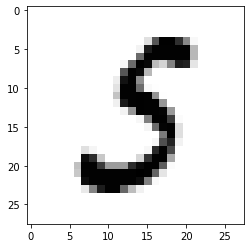

In [11]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    pred = linear(X_test)
    correct_pred = torch.argmax(pred, 1) == Y_test
    accuracy = correct_pred.float().mean()
    print('Accuracy : ', accuracy.item())
    
    # Get one and Predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)
    
    print('Label : ', Y_single_data.item())
    single_pred = linear(X_single_data)
    print('Prediction : ', torch.argmax(single_pred, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()